# **Imports**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

# **Making Dataset**

In [61]:
X,y = make_moons(n_samples=500, noise=0.05, random_state=40)

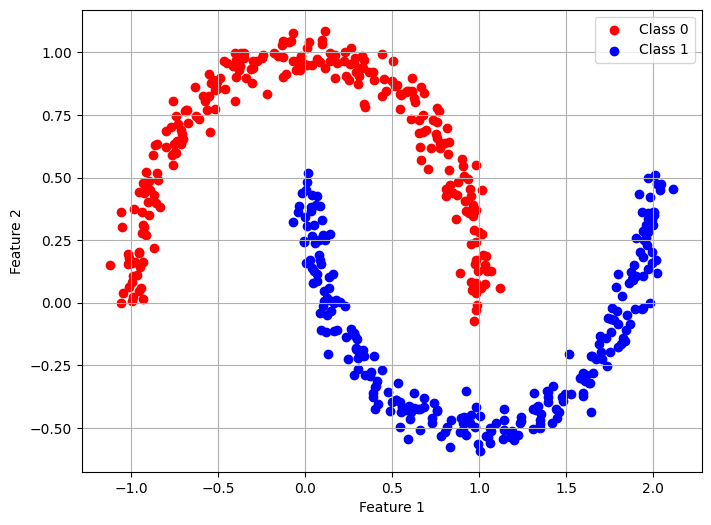

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# **Model Building**

In [63]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim = 2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                30        
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 10)               

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
# randomly initialised Weights of our model
model.get_weights()

[array([[ 0.70430905, -0.2730669 ,  0.6882306 ,  0.35591704,  0.08698803,
         -0.3787277 ,  0.10026312,  0.59601766, -0.5702354 , -0.37272614],
        [ 0.48591584,  0.29031253,  0.27745694, -0.673728  ,  0.180404  ,
         -0.6168626 ,  0.6853177 ,  0.58962744,  0.611751  ,  0.16910362]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.05542973,  0.00517595, -0.51709867, -0.3899353 ,  0.02037162,
          0.23168474,  0.34041756, -0.15687159, -0.01361895, -0.48842958],
        [ 0.44968694,  0.16143936, -0.20499495, -0.40873218,  0.14224136,
          0.17830288,  0.03729284,  0.42113042, -0.5109371 ,  0.43105423],
        [-0.23788816,  0.36318403, -0.46149883,  0.08854991, -0.19732398,
         -0.30260575,  0.00158679, -0.50168   , -0.16656116, -0.13341889],
        [ 0.02939194, -0.4808926 ,  0.03914064,  0.28021318,  0.39297932,
         -0.1951505 , -0.3214128 , -0.04021633,  0.05542529,  0.5467808 ],
        [ 0.25761

In [67]:
# Weights of first layer of our model
model.get_weights()[0]


array([[ 0.70430905, -0.2730669 ,  0.6882306 ,  0.35591704,  0.08698803,
        -0.3787277 ,  0.10026312,  0.59601766, -0.5702354 , -0.37272614],
       [ 0.48591584,  0.29031253,  0.27745694, -0.673728  ,  0.180404  ,
        -0.6168626 ,  0.6853177 ,  0.58962744,  0.611751  ,  0.16910362]],
      dtype=float32)

**`Here observe that first array is showing weights from input 1 to all 10 neurons and second array shows weights from input 2 to all 10 neurons of first hidden layer`**

In [68]:
initial_weights = model.get_weights()[0]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)

In [70]:
model.fit(X_train,y_train,epochs = 1)

13/13 [==============================] - 3s 3ms/step - loss: 0.7287 - accuracy: 0.5225


In [71]:
new_weights = model.get_weights()[0]

In [72]:
lr = model.optimizer.get_config()['learning_rate']
lr

0.001

In [73]:
gradient = (initial_weights - new_weights)/lr
gradient

array([[ 0.03927946,  0.37071106,  0.16295908,  0.33098456,  0.02876669,
        -0.09414553,  0.42928007, -0.18554924,  0.19437073,  0.14021993],
       [-0.03039837, -0.19204615, -0.10317563, -0.1669526 , -0.01266599,
         0.04315376, -0.21374224,  0.09840726, -0.10627507, -0.06961823]],
      dtype=float32)

In [74]:
percentage_change = abs(100*((initial_weights - new_weights)/initial_weights))
percentage_change

array([[0.00557702, 0.13575834, 0.02367798, 0.09299487, 0.03306971,
        0.02485837, 0.4281535 , 0.0311315 , 0.03408606, 0.03762009],
       [0.00625589, 0.06615152, 0.03718618, 0.02478042, 0.0070209 ,
        0.00699568, 0.03118879, 0.01668974, 0.01737228, 0.04116897]],
      dtype=float32)

`Here is it observable that there is very minute change in value of weights and thus we can say, old weights are basically same as new weights which is what explains the vanishing gradient problem, the gradient is soo small i.e. the change is so small that it basically vanishes`

`Increase the no of epoch to understand it more`




# SOLVING VANISHING GRADIENT PROBLEM

# **METHOD 1**
**`Reduce the no of hidden layers (not desirable in real world problems)`**






In [75]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim = 2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 10)                30        
                                                                 
 dense_56 (Dense)            (None, 10)                110       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
initial_weights = model.get_weights()[0]

In [79]:
model.fit(X_train,y_train,epochs = 1)

13/13 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.4225


In [80]:
new_weights = model.get_weights()[0]

In [81]:
lr = model.optimizer.get_config()['learning_rate']
lr

0.001

In [82]:
gradient = (initial_weights - new_weights)/lr
gradient

array([[ 12.483984, -12.463361, -12.563169,  12.522339, -12.460082,
        -12.507617,  12.437999, -12.523263, -12.399256, -12.515262],
       [-13.009428,  12.991458,  13.059675, -13.010501,  12.985705,
         13.006478, -12.988001,  13.035058,  12.981056,  13.000667]],
      dtype=float32)

In [83]:
percentage_change = abs(100*((initial_weights - new_weights)/initial_weights))
percentage_change

array([[ 2.6583455, 15.451762 ,  5.256232 ,  3.3468566,  2.601218 ,
         2.1042316,  2.2834318, 10.03582  ,  2.0773463,  5.3803167],
       [ 2.2431152, 14.997451 ,  1.8875685,  2.3623297, 11.682549 ,
         2.645328 ,  8.883754 ,  1.9281708,  2.9325907,  2.170952 ]],
      dtype=float32)

Now we can observe that the model is getting trained properly